In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [36]:
# Carga desde un archivo .csv sin indice
df = pd.read_csv('Amsterdam.csv')
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

In [37]:
# Convertimos la variables que se van a ocupar a tipo númerico

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(int)
df['host_is_superhost'] = (df['host_is_superhost'] == 't').astype(int)

In [38]:
# Convertir la variable a tipo numerica 
encoder = LabelEncoder()
df['room_type'] = encoder.fit_transform(df['room_type'])

# Obtener el mapeo de categorías a números
categorias = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Mostrar el diccionario con la correspondencia
categorias

{'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3}

In [39]:
df.to_csv("AmsterdamRM.csv")

In [75]:
# Carga desde un archivo .csv sin indice
data = pd.read_csv('AmsterdamRM.csv')
data = data.drop(columns = ["Unnamed: 0"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   int64  
 7   host_is_superhost                             9659 non-null   int64  
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

In [76]:
# Convertir la variable a tipo numerica 
encoder = LabelEncoder()
data['host_response_time'] = encoder.fit_transform(data['host_response_time'])

# Obtener el mapeo de categorías a números
categorias = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

data['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   int32  
 5   host_response_rate                            9659 non-null   int32  
 6   host_acceptance_rate                          9659 non-null   int64  
 7   host_is_superhost                             9659 non-null   int64  
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

In [77]:
data.to_csv("Prueba.csv")

In [79]:
# Carga desde un archivo .csv sin indice
dataF = pd.read_csv('Prueba.csv')
dataF = dataF.drop(columns = ["Unnamed: 0"])

# Filtrar y eliminar columnas de tipo objeto
dataF = dataF.select_dtypes(exclude=['object'])
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            9659 non-null   int64  
 1   host_response_rate                            9659 non-null   int64  
 2   host_acceptance_rate                          9659 non-null   int64  
 3   host_is_superhost                             9659 non-null   int64  
 4   room_type                                     9659 non-null   int64  
 5   id                                            9659 non-null   int64  
 6   scrape_id                                     9659 non-null   int64  
 7   host_id                                       9659 non-null   float64
 8   host_listings_count                           9659 non-null   float64
 9   host_total_listings_count                     9659 non-null   f

<Axes: xlabel='price', ylabel='host_id'>

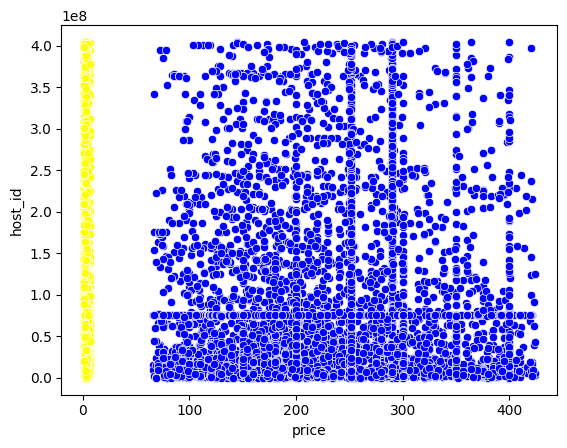

In [ ]:
from turtle import color

sns.scatterplot(x='host_response_time', y='host_id', color="blue", data=dataF)
sns.scatterplot(x='host_response_rate', y='host_id', color="red", data=dataF)
sns.scatterplot(x='host_listings_count', y='host_id', color="yellow", data=dataF)

In [95]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= dataF[['host_listings_count', 'host_response_time', 'host_response_rate']]
Var_Dep= dataF['host_id']

In [96]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [98]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [99]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'host_response_time', 'host_response_rate'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([       0.        , 14506511.48292263,  -227923.27267479]),
 'rank_': 2,
 'singular_': array([4563.73402096,   62.31476332,    0.        ]),
 'intercept_': 54181139.46577955}

**Modelo matemático**

In [100]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.014765767457491918

In [101]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=dataF[['host_listings_count', 'host_response_time', 'host_response_rate']])
y_pred

array([68687650.94870219, 68687650.94870219, 89414858.12999149, ...,
       74908346.64706886, 60401835.16414622, 46431748.19483683])

In [103]:
#Insertamos la columna de predicciones en el DataFrame
dataF.insert(0, 'Predicciones', y_pred)
dataF

,Predicciones,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,id,scrape_id,host_id,host_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6.868765e+07,1,0,0,0,0,6624170,20240905174946,34670170.0,1.0,...,4.83,4.86,4.83,4.86,4.56,4.65,1.0,1.0,0.0,0.0
1,6.868765e+07,1,0,0,0,0,8837071,20240905174946,13034277.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
2,8.941486e+07,4,100,100,0,0,716107,20240905174946,3689867.0,1.0,...,4.82,4.64,4.78,4.83,4.66,4.61,1.0,1.0,0.0,0.0
3,6.868765e+07,1,0,0,0,0,664538756986273255,20240905174946,7647768.0,1.0,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
4,7.490835e+07,3,100,86,0,2,8191077,20240905174946,43205475.0,1.0,...,4.65,4.56,4.86,4.79,4.83,4.45,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,5.418114e+07,0,0,0,0,0,966541170992774199,20240905174946,246243877.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9655,6.040184e+07,2,100,20,0,0,1071580910909485585,20240905174946,10528290.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9656,7.490835e+07,3,100,67,0,0,917770101011925774,20240905174946,8325013.0,1.0,...,5.00,5.00,5.00,5.00,5.00,4.83,1.0,1.0,0.0,0.0
9657,6.040184e+07,2,100,50,0,0,1213897347496953929,20240905174946,154774784.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0


<Axes: xlabel='host_response_time', ylabel='host_id'>

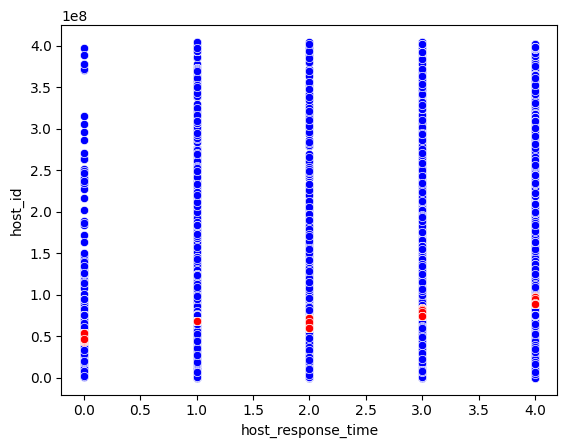

In [105]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_time', y='host_id', color="blue", data=dataF)
sns.scatterplot(x='host_response_time', y='Predicciones', color="red", data=dataF)

In [106]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.014765767457491918

In [107]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12151447427155301